In [1]:
! pip install -Uqq fastai nbdev fastbook

In [2]:
from fastai.text.all import *
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/comprehensive-goodreads-book-dataset/book_details.csv")

In [4]:
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/twitter.png"))

In [5]:
df.head()

,title,url,description,genres
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, ""To Kill A Mockingbird"" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and transla...","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Read For School', 'Novels', 'High School']"
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reason ... HARRY POTTER IS A WIZARD!","['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics', 'Adventure', 'Audiobook', 'Science Fiction Fantasy']"
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride_and_Prejudice,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book t...","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook', 'Novels', 'Historical Romance', 'Adult']"
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament to the human spirit.In 1942, with the Nazis occupying Holland, a thirteen-year-old Jewish girl and her family fled their home in Amsterdam and went into hiding. For the next two years, until their whereabouts were betrayed to the Gestapo, the Franks and another family lived cloistered in the “Secret Annexe” of an old office building. Cut off from the outside world, they faced hunger, boredom, the ...","['Classics', 'Nonfiction', 'History', 'Biography', 'Memoir', 'Historical', 'Holocaust']"
4,Animal Farm,https://www.goodreads.com/book/show/170448.Animal_Farm,"Librarian's note: There is an Alternate Cover Edition for this edition of this book here.A farm is taken over by its overworked, mistreated animals. With flaming idealism and stirring slogans, they set out to create a paradise of progress, justice, and equality. Thus the stage is set for one of the most telling satiric fables ever penned –a razor-edged fairy tale for grown-ups that records the evolution from revolution against tyranny to a totalitarianism just as terrible.When was first published, Stalinist Russia was seen as its target. Today it is devastatingly clear that wherever and wh...","['Classics', 'Fiction', 'Dystopia', 'Fantasy', 'Politics', 'Literature', 'School', 'Science Fiction', 'Novels', 'Read For School']"


In [6]:
df.shape

(6313, 4)

In [7]:
df.isnull().sum()

title           0
url             0
description    39
genres          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6313 non-null   object
 1   url          6313 non-null   object
 2   description  6274 non-null   object
 3   genres       6313 non-null   object
dtypes: object(4)
memory usage: 197.4+ KB


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

title          0
url            0
description    0
genres         0
dtype: int64

In [11]:
df.shape

(6274, 4)

In [12]:
df["description_new"]=df['title']+" "+df["description"]

In [13]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 640
{'Classics': 1918, 'Fiction': 4315, 'Historical Fiction': 1262, 'School': 423, 'Literature': 1363, 'Young Adult': 1263, 'Historical': 1008, 'Read For School': 109, 'Novels': 1657, 'High School': 77, 'Fantasy': 1664, 'Magic': 387, 'Childrens': 572, 'Middle Grade': 406, 'Adventure': 931, 'Audiobook': 1915, 'Science Fiction Fantasy': 511, 'Romance': 1185, 'Historical Romance': 76, 'Adult': 1278, 'Nonfiction': 1527, 'History': 630, 'Biography': 554, 'Memoir': 476, 'Holocaust': 78, 'Dystopia': 292, 'Politics': 353, 'Science Fiction': 710, 'France': 154, 'Philosophy': 698, 'French Literature': 76, 'American': 369, 'Coming Of Age': 162, 'Epic Fantasy': 113, 'High Fantasy': 192, 'War': 340, 'World War II': 155, 'Books About Books': 49, 'Gothic': 86, '19th Century': 158, 'Christian': 187, 'Christian Fiction': 71, 'Plays': 152, 'Drama': 468, 'Poetry': 232, 'Contemporary': 1306, 'Picture Books': 120, 'Juvenile': 176, 'Short Stories': 282, 'Kids': 61, 'Animals': 159, 'Chapter

In [14]:
genre_list = []
indices_to_drop = []
for idx, genres in enumerate(df.genres.to_list()):
  genres_list = eval(genres)
  if len(genres_list):
    genre_list.append(genres_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(df.index[indices_to_drop]).reset_index(drop=True)
df.shape

(6119, 5)

In [15]:
df['genre'] = genre_list

In [16]:
df.drop(columns=["title","url","description","genres"],axis=1,inplace=True)

In [17]:
df1=df.copy()

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = re.sub(r"[^a-zA-Z]", " ", text)
        text = text.translate(str.maketrans("", "", string.punctuation))

        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        text = re.sub(r"#.*", "", text)
        text = re.sub(r"/\*.*?\*/", "", text, flags=re.DOTALL)
        text = text.lower()

       
        nltk_stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in nltk_stop_words]

        text = ' '.join(tokens)

        return text
    else:
        return ""


In [19]:
df["description_new"]=df["description_new"].apply(clean_text)

<ipython-input-18-5a427ec412a1>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [20]:
df.head()

,description_new,genre
0,kill mockingbird unforgettable novel childhood sleepy southern town crisis conscience rocked kill mockingbird became instant bestseller critical success first published went win pulitzer prize later made academy award winning film also classic compassionate dramatic deeply moving kill mockingbird takes readers roots human behavior innocence experience kindness cruelty love hatred humor pathos million copies print translated forty languages regional story young alabama woman claims universal appeal harper lee always considered book simple love story today regarded masterpiece american liter...,Classics
1,harry potter philosopher stone harry potter thinks ordinary boy rescued owl taken hogwarts school witchcraft wizardry learns play quidditch battle deadly duel reason harry potter wizard,Fantasy
2,pride prejudice alternate cover edition isbn since immediate success pride prejudice remained one popular novels english language jane austen called brilliant work darling child vivacious heroine elizabeth bennet delightful creature ever appeared print romantic clash opinionated elizabeth proud beau mr darcy splendid performance civilized sparring jane austen radiant wit sparkles characters dance delicate quadrille flirtation intrigue making book superb comedy manners regency england,Classics
3,diary young girl discovered attic spent last years life anne frank remarkable diary become world classic powerful reminder horrors war eloquent testament human spirit nazis occupying holland thirteen year old jewish girl family fled home amsterdam went hiding next two years whereabouts betrayed gestapo franks another family lived cloistered secret annexe old office building cut outside world faced hunger boredom constant cruelties living confined quarters ever present threat discovery death diary anne frank recorded vivid impressions experiences period turns thoughtful moving surprisingly ...,Classics
4,animal farm librarian note alternate cover edition edition book farm taken overworked mistreated animals flaming idealism stirring slogans set create paradise progress justice equality thus stage set one telling satiric fables ever penned razor edged fairy tale grown ups records evolution revolution tyranny totalitarianism terrible first published stalinist russia seen target today devastatingly clear wherever whenever freedom attacked whatever banner cutting clarity savage comedy george orwell masterpiece meaning message still ferociously fresh,Classics


In [21]:
df["genre"].value_counts()

genre
Fiction                  1308
Nonfiction                677
Fantasy                   610
Classics                  453
Historical Fiction        328
                         ... 
Medicine                    1
Portuguese Literature       1
Young Adult Romance         1
Pulp                        1
Mental Illness              1
Name: count, Length: 151, dtype: int64

In [22]:

import plotly.express as px


genre_counts = df["genre"].value_counts().reset_index()
genre_counts.columns = ["genre", "count"]

fig = px.bar(genre_counts,x="genre",y="count",title="Genre Countplot",color="genre")


fig.update_layout(xaxis_title="Genre",yaxis_title="Count", template="plotly_white")

fig.show()


In [23]:
top5_genres = genre_counts.head(5)

fig = px.pie(
    top5_genres,
    names="genre",
    values="count",
    title="Top 5 Genre Distribution",
    color="genre",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

In [24]:
fig = px.pie(
    top5_genres,
    names="genre",
    values="count",
    title="Top 5 Genre Distribution - Donut Chart",
    color="genre",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0.6 
)

fig.show()

# Most Common Words From text Data

In [25]:
import plotly.express as px
from itertools import chain
from collections import Counter

data_set = df["description_new"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

fig = px.bar(
    df_common_words,
    x="Count",
    y="Word",
    orientation="h",
    color="Word",
    title="30 Most Common Words",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Word",
    yaxis=dict(categoryorder="total ascending"),
    title=dict(font=dict(size=20)),
    template="plotly_white"
)

fig.show()


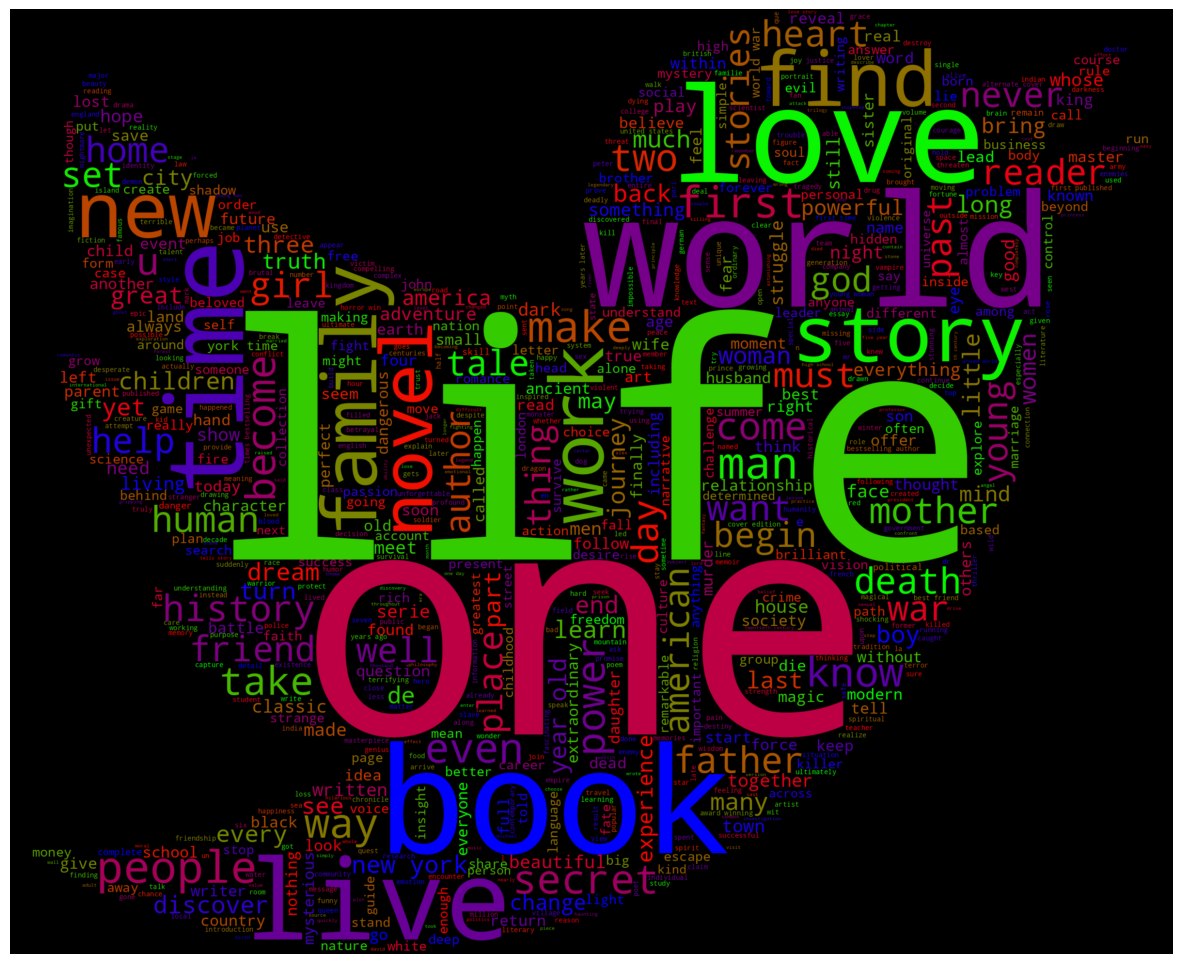

In [26]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
all_text=" ".join(df['description_new'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="brg",mask=mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:

dls = TextDataLoaders.from_df(df1,path='.',text_col='description_new',seed=42,valid_pct=0.2,bs=16,
                              shuffle=True,seq_len=512,is_lm=True)

dls.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj what xxmaj got xxmaj you xxmaj here xxmaj wo n't xxmaj get xxmaj you xxmaj there xxmaj america 's most sought - after executive coach shows how to climb the last few xxunk of the ladder xxmaj the corporate world is filled with executives , men and women who have worked hard for years to reach the upper levels of management . xxmaj they 're intelligent , skilled , and even charismatic . xxmaj but only a handful of them will ever reach the pinnacle -- and as executive coach xxmaj marshall xxmaj goldsmith shows in this book , subtle nuances make all the difference . xxmaj these are small "" xxunk flaws "" performed by one person against another ( as simple as not saying thank you enough ) , which lead to negative perceptions that can hold any executive back . xxmaj using xxmaj goldsmith 's","xxmaj what xxmaj got xxmaj you xxmaj here xxmaj wo n't xxmaj get xxmaj you xxmaj there xxmaj america 's most sought - after executive coach shows how to climb the last few xxunk of the ladder xxmaj the corporate world is filled with executives , men and women who have worked hard for years to reach the upper levels of management . xxmaj they 're intelligent , skilled , and even charismatic . xxmaj but only a handful of them will ever reach the pinnacle -- and as executive coach xxmaj marshall xxmaj goldsmith shows in this book , subtle nuances make all the difference . xxmaj these are small "" xxunk flaws "" performed by one person against another ( as simple as not saying thank you enough ) , which lead to negative perceptions that can hold any executive back . xxmaj using xxmaj goldsmith 's straightforward"
1,"road : xxmaj the xxmaj problem xxmaj being xxunk 4 ) xxmaj before xxmaj herring xxmaj cove xxmaj road : xxmaj ruth xxmaj goldman and the xxmaj xxunk xxbos xxmaj elephant xxmaj run xxmaj in 1941 , bombs drop from the night skies of xxmaj london , xxunk the apartment xxmaj nick xxmaj xxunk lives in with his mother . xxmaj deciding the situation in xxmaj england is too unstable , xxmaj nick 's mother sends him to live with his father in xxmaj burma , hoping he will be safer living on the family 's xxunk xxunk as soon as xxmaj nick arrives , trouble erupts in this remote xxmaj xxunk elephant village . xxmaj japanese soldiers invade , and xxmaj nick 's father is taken prisoner . xxmaj nick is stranded on the plantation , forced to work as a servant to the new rulers . xxmaj as",": xxmaj the xxmaj problem xxmaj being xxunk 4 ) xxmaj before xxmaj herring xxmaj cove xxmaj road : xxmaj ruth xxmaj goldman and the xxmaj xxunk xxbos xxmaj elephant xxmaj run xxmaj in 1941 , bombs drop from the night skies of xxmaj london , xxunk the apartment xxmaj nick xxmaj xxunk lives in with his mother . xxmaj deciding the situation in xxmaj england is too unstable , xxmaj nick 's mother sends him to live with his father in xxmaj burma , hoping he will be safer living on the family 's xxunk xxunk as soon as xxmaj nick arrives , trouble erupts in this remote xxmaj xxunk elephant village . xxmaj japanese soldiers invade , and xxmaj nick 's father is taken prisoner . xxmaj nick is stranded on the plantation , forced to work as a servant to the new rulers . xxmaj as life"
2,"marrying them to each other to honor a five - generation - old deal that took place between their ancestors . xxmaj for xxmaj ivory , whose heart has just been broken , her marriage to the handsome but cold xxmaj darius xxmaj xxunk fails to provide her the happy life she wants . xxmaj instead , she finds herself in endless boredom and doing the same things she 'd been doing the past six months . xxmaj that is , until xxmaj darius arrives home from his training and her ex returns in the picture . xxmaj thrown in her loyal best friend , xxmaj rose , and xxmaj darius 's insane cousin , xxmaj adrian . xxmaj her life suddenly turns upside down and becomes exciting and a whole lot xxunk ! xxmaj it 's a long journey full of tears , fun , joy , even insanity","them to each o

# Save DataLoader

In [28]:
import os
output_dir="/kaggle/working/dataloaders"
os.makedirs(output_dir,exist_ok=True)

In [29]:
torch.save(dls, "/kaggle/working/dataloaders/dataloader.pkl")

In [30]:
dls = torch.load("/kaggle/working/dataloaders/dataloader.pkl",weights_only=False)

# language_model_learner

In [31]:

learner = language_model_learner(dls, AWD_LSTM,drop_mult=0.2,metrics=[accuracy, Perplexity()]).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [32]:
learner.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(19960, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(19960, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0-2): 3 x RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=19960, bias=True)
    (output_dp): RNNDropout()
  )
)

# Train Model

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Suggested Learning Rates - Valley: 0.005248074419796467, Slide: 0.009120108559727669


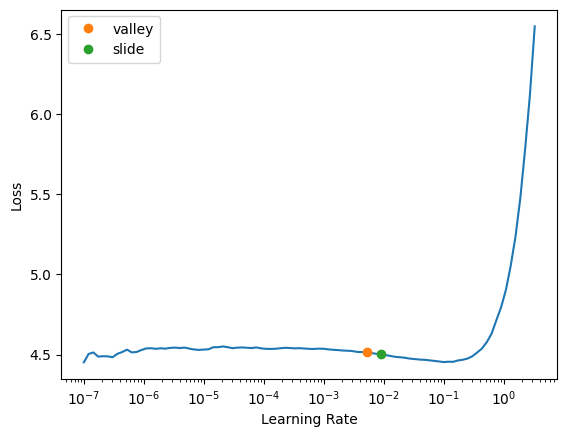

In [33]:
lr_min, lr_steep = learner.lr_find(suggest_funcs=(valley, slide))


print(f"Suggested Learning Rates - Valley: {lr_min}, Slide: {lr_steep}")

In [34]:
learner.fit_one_cycle(5, lr_min) 

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.313475,4.161857,0.297209,64.190590,00:52
1,4.034078,4.012882,0.303346,55.306019,00:52
2,3.773582,3.977929,0.307304,53.406296,00:52
3,3.600963,3.970364,0.308280,53.003826,00:52
4,3.497211,3.970561,0.308285,53.014278,00:52


In [35]:
learner.unfreeze()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Valley: 5.248074739938602e-05, Slide: 0.02754228748381138


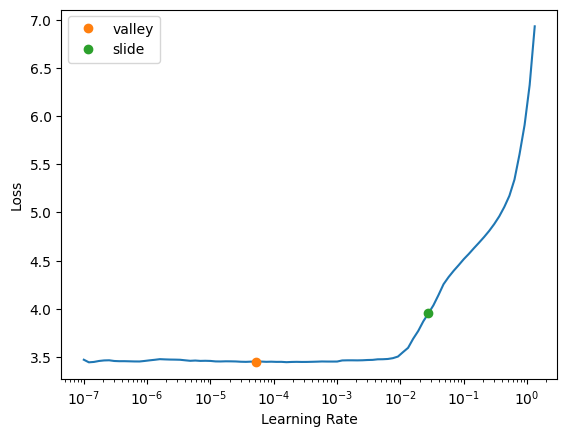

In [36]:
lr_min, lr_steep = learner.lr_find(suggest_funcs=(valley, slide))
print(f"Valley: {lr_min}, Slide: {lr_steep}")


In [37]:
learner.fit_one_cycle(20, slice(lr_min, lr_steep))



/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.491875,3.967860,0.305901,52.871239,00:58
1,3.474737,3.998107,0.306129,54.494892,00:58
2,3.446565,4.096422,0.301486,60.124786,00:58
3,3.360751,4.197177,0.299564,66.498367,00:58
4,3.182822,4.312442,0.293832,74.622482,00:58
5,2.943787,4.458368,0.288933,86.346458,00:58
6,2.692963,4.618824,0.287530,101.374748,00:58
7,2.432115,4.798782,0.282111,121.362549,00:58
8,2.204099,4.986570,0.276776,146.433350,00:58
9,1.980123,5.163998,0.274458,174.862183,00:58


In [38]:
os.makedirs("/kaggle/working/model_dir",exist_ok=True)
learner.save("/kaggle/working/model_dir/book_genre_classifier_model")


Path('/kaggle/working/model_dir/book_genre_classifier_model.pth')

In [39]:
learner.load("/kaggle/working/model_dir/book_genre_classifier_model")

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [40]:

learner.export('/kaggle/working/model_dir/fine_tuned_language_model.pkl')

In [41]:
learner = load_learner('fine_tuned_language_model.pkl')

text = "Forensic psychologist Dr. Evelyn Harper is drawn into a missing child case linked to her past. As she uncovers a dark conspiracy, a mysterious figure, The Watcher, stalks her. Evelyn must solve the case before becoming the next victim."


prediction = learner.predict(text)
print(f"Predicted Label: {prediction}")



Predicted Label: Forensic psychologist Dr xxunk Evelyn Harper xxunk drawn xxunk xxunk missing child case linked xxunk xxunk past xxunk Xxunk xxunk uncovers xxunk dark conspiracy xxunk xxunk mysterious figure xxunk Xxunk Xxunk xxunk stalks xxunk xxunk Evelyn must solve xxunk case xxunk becoming xxunk next victim xxunk cat
